In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import db_builder.db_handler as dbh
import logging

logging.getLogger('sqlalchemy').setLevel(logging.WARNING)
db_params = {
    'user': 'postgres',
    'password': input('Please enter DB pw'),  # enter your DB password
    'host': 'localhost',  # 'localhost' or IP address
    'port': '5432',  # '5432'
    'database': 'ttdatabase',  #tensionTerminator
}
toolcheck = dbh.DB_Conn(db_params)
toolcheck.connect()
engine = toolcheck.get_engine()

Connected to PostgreSQL, DB: ttdatabase


In [2]:
def table_to_df(tabel_name: str):
    return pd.read_sql_table(tabel_name, con=engine)

In [3]:
def get_tools(id):
    tools_df = table_to_df('bodyside')
    tool_loc = tools_df.loc[tools_df['id'] == id].values
    return f"{tool_loc[0][1]}"

In [4]:
tools_loop_association_df = table_to_df('bodyside_loop_association')
tools_df = table_to_df('bodyside')

2023-11-19 19:42:06,658 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2023-11-19 19:42:06,659 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-11-19 19:42:06,660 INFO sqlalchemy.engine.Engine select current_schema()
2023-11-19 19:42:06,661 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-11-19 19:42:06,661 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2023-11-19 19:42:06,662 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-11-19 19:42:06,663 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-19 19:42:06,666 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_class.relname = %(table_name)s AND pg_catalog.pg_class.relkind = ANY (ARRAY[%(param_1)s, %(param_2)s, %(param_3)s, %(param_4)s, %(param_5)s]) AND pg_catalog.pg_table_is_visible(pg_catalog.pg_class.oid) AND pg_catalog.pg_namespace.nspname != %(nspname

2023-11-19 19:42:06,841 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-19 19:42:06,842 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_class.relname = %(table_name)s AND pg_catalog.pg_class.relkind = ANY (ARRAY[%(param_1)s, %(param_2)s, %(param_3)s, %(param_4)s, %(param_5)s]) AND pg_catalog.pg_table_is_visible(pg_catalog.pg_class.oid) AND pg_catalog.pg_namespace.nspname != %(nspname_1)s
2023-11-19 19:42:06,842 INFO sqlalchemy.engine.Engine [cached since 0.1759s ago] {'table_name': 'bodyside', 'param_1': 'r', 'param_2': 'p', 'param_3': 'f', 'param_4': 'v', 'param_5': 'm', 'nspname_1': 'pg_catalog'}
2023-11-19 19:42:06,845 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.

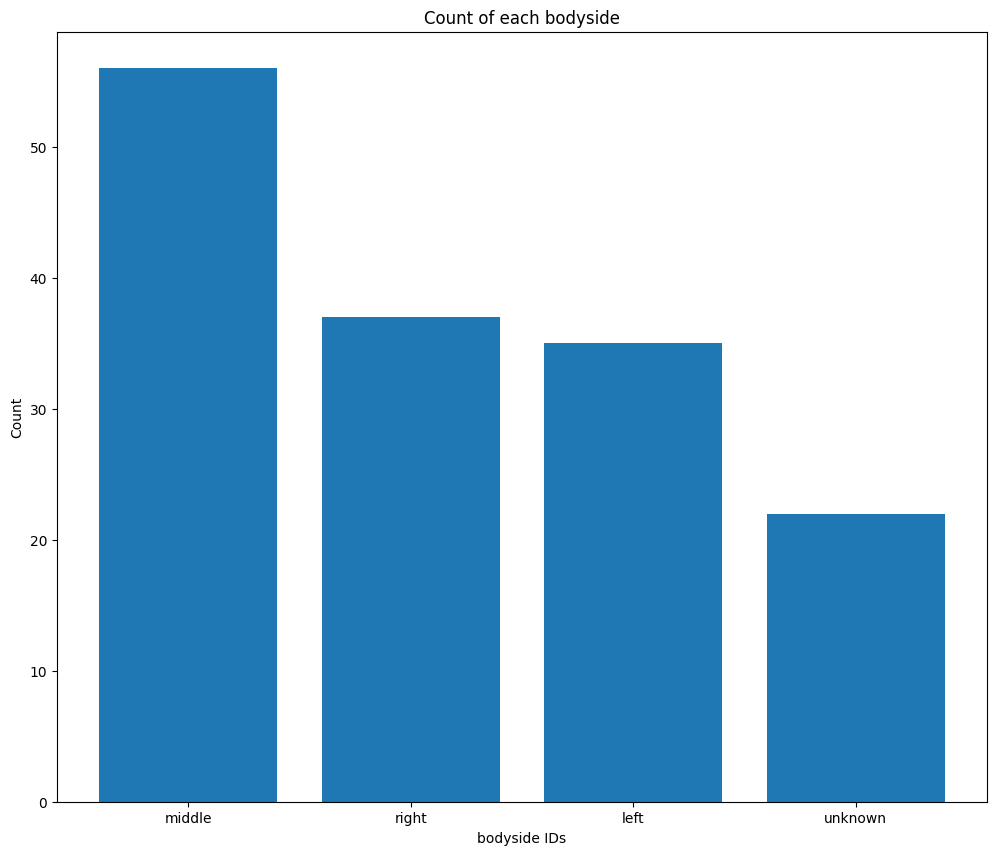

In [5]:
value_count_tools = tools_loop_association_df['bodyside_id'].value_counts()
tool_ids = [get_tools(x) for x in value_count_tools.index]
tool_counts = value_count_tools.values

plt.figure(figsize=(12, 10))

plt.bar(tool_ids, tool_counts)
plt.xlabel('bodyside IDs')
plt.ylabel('Count')
plt.title('Count of each bodyside')

plt.show()